**Multiple Linear Regression**

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545

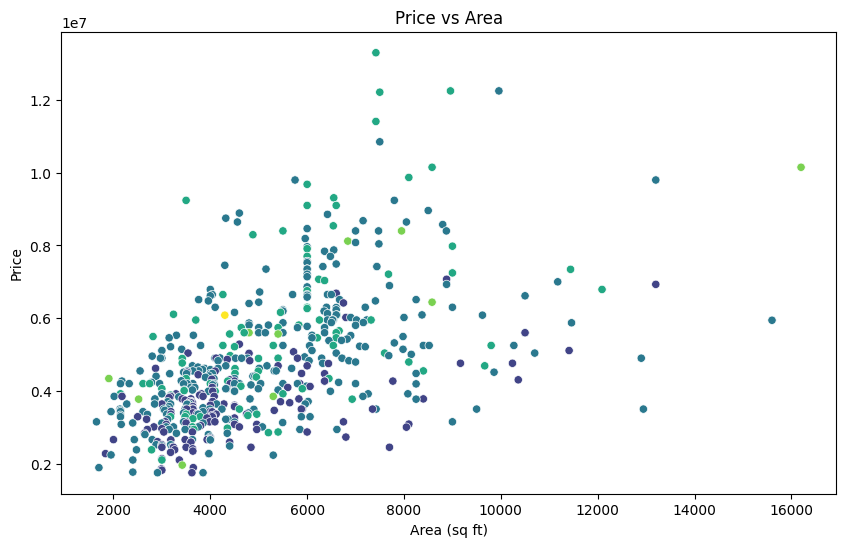

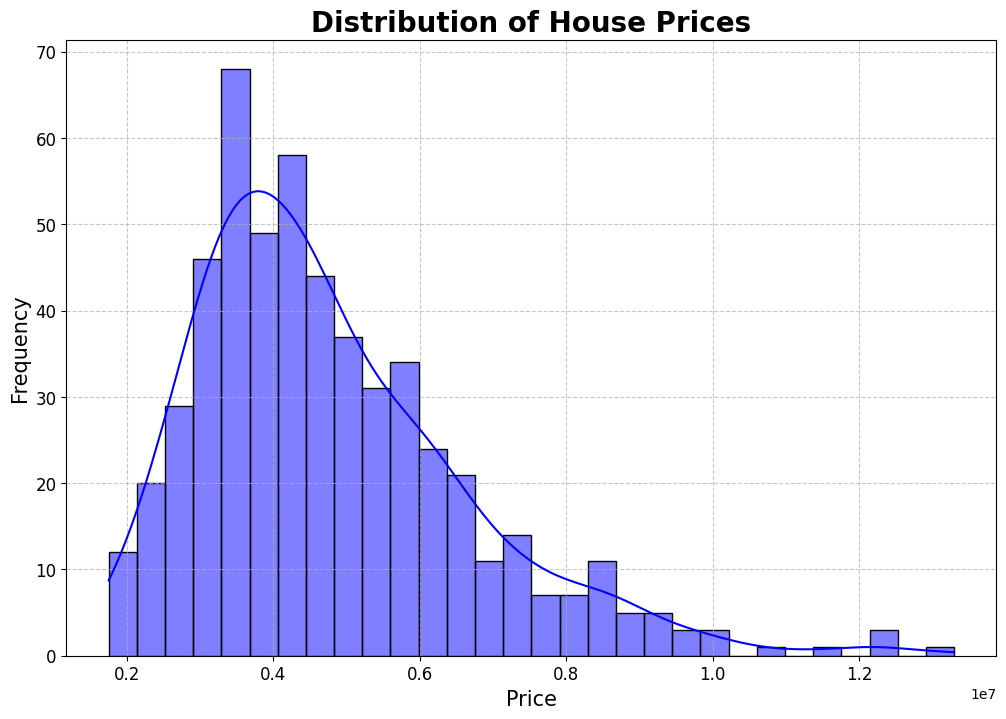

<ipython-input-17-156ded7f60d7>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bedrooms', data=df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list

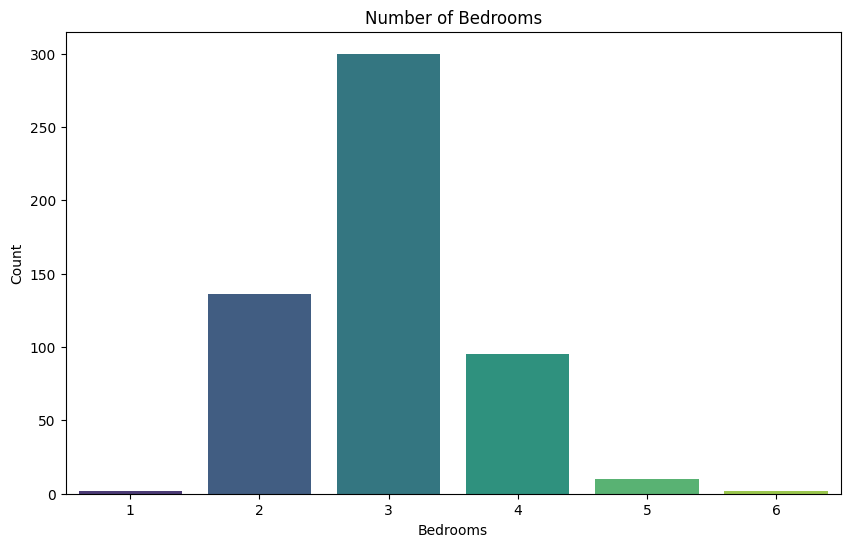

<ipython-input-17-156ded7f60d7>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bathrooms', data=df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 lis

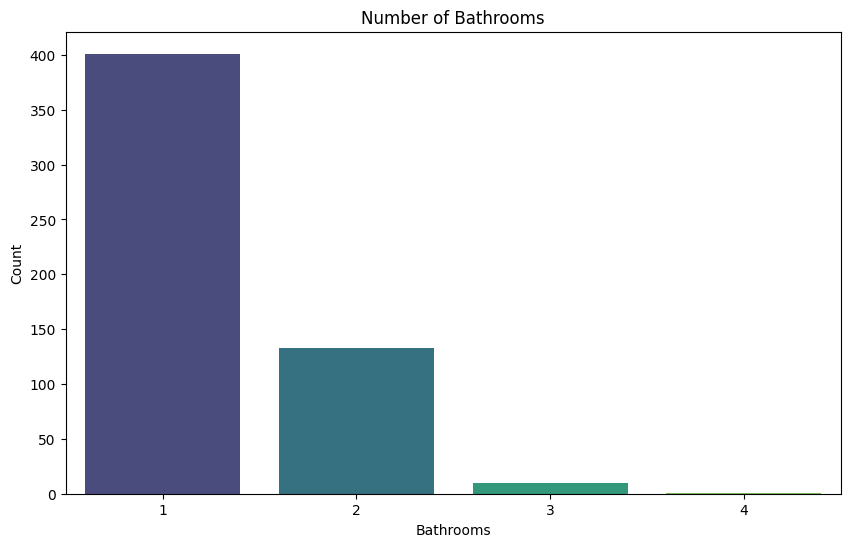

Mean Squared Error: 2750040479309.0522
R-Squared: 0.4559299118872445
Coefficients:
area: 345.4665700831111
bedrooms: 360197.6504575056
bathrooms: 1422319.657641412
Intercept: 59485.379208717495


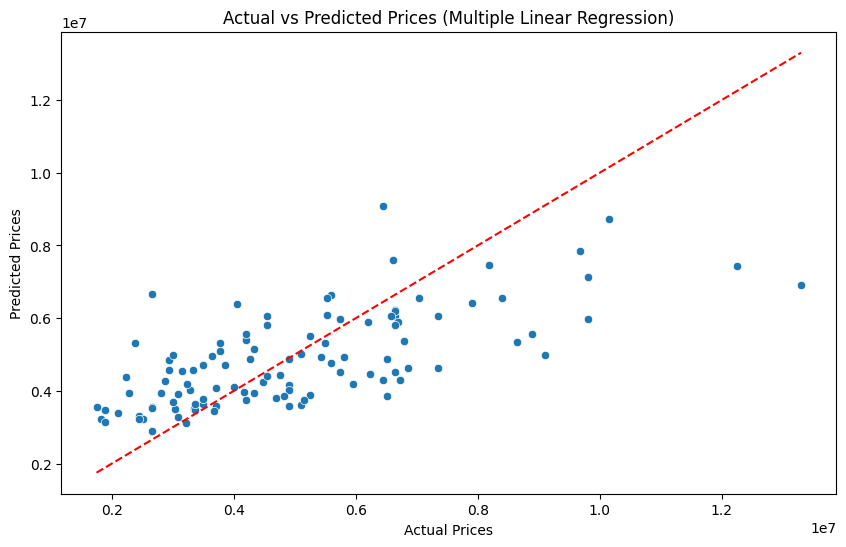

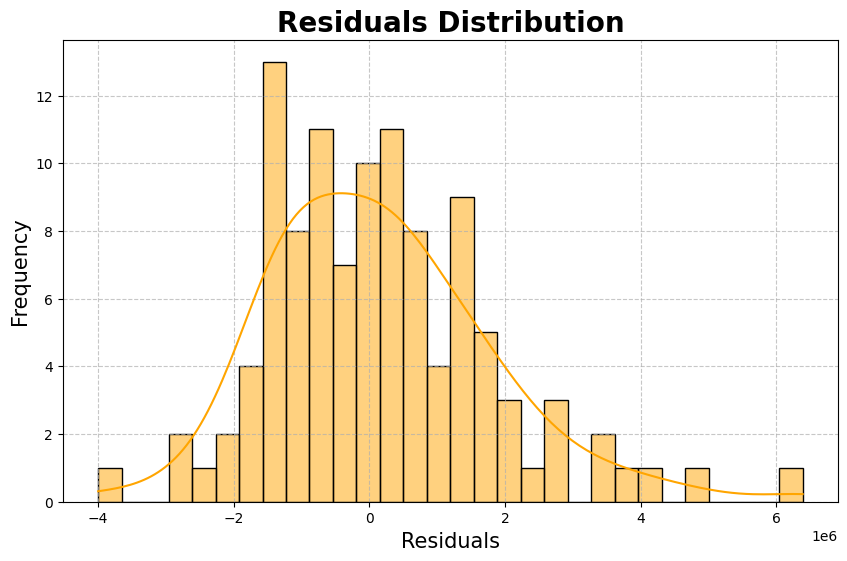

In [ ]:
# Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load and Explore Data
df = pd.read_csv("Housing.csv")

# Display Rows of Dataset
print(df.head())

# The describe() function
print(df.describe())

# Check for infinite values and replace them with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values in the 'price' column
df.dropna(subset=['price'], inplace=True)

# Visualizing the Data

# Scatter Plot of Price vs Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', hue='bedrooms', data=df, palette='viridis', legend=False)
plt.title('Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.show()

# Distribution Plot of Price
plt.figure(figsize=(12, 8))
sns.histplot(df['price'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of House Prices', fontsize=20, weight='bold')
plt.xlabel('Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Count Plot of Bedrooms
plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', data=df, palette='viridis')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

# Count Plot of Bathrooms
plt.figure(figsize=(10, 6))
sns.countplot(x='bathrooms', data=df, palette='viridis')
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

# Selecting relevant columns
df = df[['price', 'area', 'bedrooms', 'bathrooms']]

# Creating Independent and Dependent Variables
X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

# Printing the model coefficients
print("Coefficients:")
for idx, col in enumerate(X.columns):
    print(f"{col}: {model.coef_[idx]}")
print(f"Intercept: {model.intercept_}")

# Visualizing the results: Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Multiple Linear Regression)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # Diagonal line for reference
plt.show()

# Visualizing the Residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, bins=30, kde=True, color='orange', edgecolor='black')
plt.title('Residuals Distribution', fontsize=20, weight='bold')
plt.xlabel('Residuals', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()